In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

<font size=6><b>Lec08.NLP 언어모델
* NLP (Natural Language Processing, 자연어 처리)   * 언어 모델(Language Model, LM)은 언어라는 현상을 모델링하고자 단어 시퀀스(문장)에 확률을 할당(assign)하는 모델 


<font size=6><b>언어모델
* N-gram
* <b>빈도기반 
    * <b>BoW(Bag of Words)
    * <b>TF-IDF(Term Frequency - Inverse Document Frequency)
* 코사인 유사도(Cosine Similarity)

# N-gram

# BoW(Bag of Words) - 단어 출현 빈도
* 단어들의 <b>순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)</b>에만 집중하는 텍스트 데이터의 수치화 표현 방법

### corpus 에서 제공하는 불용어처리

In [2]:
from nltk.corpus import stopwords
stop_words_list = stopwords.words('english')
print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])

불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [3]:
# doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."

from sklearn.feature_extraction.text import CountVectorizer #벡터를 이용해 문장을 벡터화 시키고 빈도 리턴

# corpus = ['you know I want your love. because I love you.']
corpus = ['정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.']
vector = CountVectorizer(stop_words=["because", "I"]) #사용자 정의 불용어
vector = CountVectorizer(stop_words='english')  #기본으로 제공하는 불용어
vector = CountVectorizer(stop_words=stop_words_list) #사용자 + 기본



# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 
# 토큰화 : 단순히 글자를 잘라내는 기능
# bag : 잘라내기 + 빈도수 체크
# 카운트 기반 원핫 인코딩 문제 --> voca 사이즈만큼 행렬이 만들어진다. 희소행렬문제 발생[[10000],[01000],[00100],...,[00001]]]
# bag of words vector : [[1 1 1 1 1 1 1]] --> voca 사이즈만큼 만들어서 희소행렬 문제 해소
# 나는 밥과 국을 먹었다. [1 1 1 1]
# 나는 밥을 밥을 먹었다. [1 2 0 1]
# 1 array로 만들면서 count 까지 해준다.



# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_)


bag of words vector : [[1 1 1 1 1 1 1]]
vocabulary : {'정부가': 6, '발표하는': 4, '물가상승률과': 2, '소비자가': 5, '느끼는': 0, '물가상승률은': 3, '다르다': 1}


In [4]:
#sorting 하기

vocab_sorted = sorted(vector.vocabulary_.items(), key = lambda x:x[1], reverse = False)
print(vocab_sorted)

[('느끼는', 0), ('다르다', 1), ('물가상승률과', 2), ('물가상승률은', 3), ('발표하는', 4), ('소비자가', 5), ('정부가', 6)]


# DTM
문서 단어 행렬(DTM, Document-Term Matrix)
* 각 문서에서 등장한 단어의 빈도를 행렬의 값으로 표기해 서로 다른 문서들을 비교
* 다수의 BoW : 각 문서에 대한 BoW를 하나의 행렬로 만든 것

* **<단점>**
    - <b>희소 표현(Sparse representation)</b> : 단어 집합의 크기 == 벡터의 차원이 되고 대부분의 값이 0이 된다
    - <b>단순 빈도 수 기반 접근</b> : '이다'와 같은 중요하지 않은 최빈도 단어로 문서를 연관지으면??
    - <font color='red'> <b>TF-IDF 필요 (DTM에 불용어와 중요한 단어에 대해서 가중치)</font></b>

## sorting, 단어행렬화

In [5]:
corpus = ['먹고 싶은 사과',
'먹고 싶은 바나나',
'길고 노란 바나나 바나나',
'저는 과일이 좋아요']

In [6]:
from keras.preprocessing.text import Tokenizer

token = Tokenizer()
token.fit_on_texts(corpus)
print(token.word_counts) 

OrderedDict([('먹고', 2), ('싶은', 2), ('사과', 1), ('바나나', 3), ('길고', 1), ('노란', 1), ('저는', 1), ('과일이', 1), ('좋아요', 1)])


* 문서 단어 행렬화 --> 정렬하기

In [7]:
vector = CountVectorizer()
vec = vector.fit_transform(corpus).toarray() #문서 단어 행렬화

voca_ = vector.vocabulary_ #vec에 있는 단어들 추출하기
col = vector.vocabulary_.keys() #딕트 키값 산출
vocab_sorted = sorted(vector.vocabulary_.items(), key = lambda x:x[1], reverse = False) #딕트 정렬


print(vec)
print(vector.vocabulary_) #딕트 리턴
print(vocab_sorted)

[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]
{'먹고': 3, '싶은': 6, '사과': 5, '바나나': 4, '길고': 1, '노란': 2, '저는': 7, '과일이': 0, '좋아요': 8}
[('과일이', 0), ('길고', 1), ('노란', 2), ('먹고', 3), ('바나나', 4), ('사과', 5), ('싶은', 6), ('저는', 7), ('좋아요', 8)]


In [8]:
col_dic = dict(vocab_sorted) # 보카 딕트로 변환

col = col_dic.keys() #sorting된 키 꺼내기
col

dict_keys(['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요'])

In [9]:
from pandas import pandas as pd

vecdf = pd.DataFrame(vec, columns = col )
vecdf

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [10]:
## DTM

corpus_list = ['먹고 싶은 사과',
        '먹고 싶은 바나나',
        '길고 노란 바나나 바나나',
        '저는 과일이 좋아요']

# --- BoW : 사전에 있으면 1 없으면 0 또있으면 누적 [1,0,0,1,2]
vector = CountVectorizer()  

bow = vector.fit_transform(corpus_list).toarray()
print('BoW : \n', bow)   #COO(밀집) CSR(희소)

# --- BoW : 에 있는 단어가 숫자 ?로 변경되었는지 확인
print('vocabulary \n:',vector.vocabulary_)
# --- BoW : 에 있는 단어를 index 순으로 정렬
vocab_sorted = sorted(vector.vocabulary_.items(), key = lambda x:x[1], reverse = False)
print(vocab_sorted)


# --- BoW : 에 있는 단어를 index 순으로 정렬 --> 중에서 key(단어)만 가져오기
vocab_word = [t[0] for t in vocab_sorted ]
# print(vocab_word)

vocab_word = dict(vocab_sorted).keys()
print(vocab_word)
    

# --- DTM : BoW집합  (인덱스:문서번호, 컬럼:단어들(vocab_word),  값:BoW)
df = pd.DataFrame(bow, columns=vocab_word)
df

BoW : 
 [[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]
vocabulary 
: {'먹고': 3, '싶은': 6, '사과': 5, '바나나': 4, '길고': 1, '노란': 2, '저는': 7, '과일이': 0, '좋아요': 8}
[('과일이', 0), ('길고', 1), ('노란', 2), ('먹고', 3), ('바나나', 4), ('사과', 5), ('싶은', 6), ('저는', 7), ('좋아요', 8)]
dict_keys(['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요'])


,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


# TF_IDF
* 단어 빈도-역 문서 빈도(TF-IDF, Term Frequency-Inverse Document Frequency)
* 우선 DTM을 만든 후, TF-IDF 가중치를 부여
* 주로 문서의 유사도를 구하는 작업, 검색 시스템에서 검색 결과의 중요도를 정하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 활용
* TF-IDF = TF * IDF

* 문서(d), 단어(t), 문서총개수(n)
* <font color='red'> $tf(d,t)$ : 특정 문서 d에서의 특정 단어 t의 등장 횟수</font>
* <font color='red'>  $df(t)$ : 특정 단어 t가 등장한 문서의 수 </font>
* <font color='red'>  $idf(d, t) = log (\frac{n}{1+df(t)})$ : df(t) 역수</font>

DF : 문서 어디에 바나나가 나왔나?  
TF : 특정 문서에서 특정 바나나의 등장 횟수

## 공통함수

In [11]:
corpus_list = ['먹고 싶은 사과',
'먹고 싶은 바나나',
'길고 노란 바나나 바나나',
'저는 과일이 좋아요']

#상위코드 참조 : 단어집 = vocab

vocab = ['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [12]:
def tf(t, d): #DTM = Bow 의 집합
    return d.count(t)

def idf(t):
    #--- 문서들(docs)에서 해당 단어(t)가 쓰인 빈도수
    DFCOUNT = 0
    for doc in corpus_list:
        DFCOUNT += t in doc #해당 문서doc에서 해당 DF가 얼마나 나왔는지(DFCOUNT)
    return np.log(N/(DFCOUNT + 1)) # np.log1p(N/df) = 너무 작은 수는 안나올 수 있으니 로그처리, N = 문서갯수

def tfidf(t, d):
    return tf(t,d) * idf(t)

## [실습]

## TF (TDM = BoWs)
    - 특정 문서에서 특정 단어가 얼마나 등장하는가?
    - 한 문장에 바나나가 몇 번 나오는가?

In [13]:
N = len(corpus_list) # 문서의 갯수
N

4

In [14]:
N = len(corpus_list)
wcnt_list = []

for i in range(N) :
    d = corpus_list[i]           # d : 문서 번호
    # count_list.append([])
    for t in vocab : # vocab size = 9
        # t = vocab[j]             # 보캡 루프 돌면서 꺼낸 단어들을 t 변수에 넣는다.
        tf(t,d)                  # 해당 문서에서 dtm 카운트 함수
        wcnt_list.append(tf(t,d)) #d 문서에서 t단어가 출현한 빈도수 추가
                   # -1 : count_list.append([])의 []안에 append해라

wcnt_list = np.array(wcnt_list).reshape(N,-1) #문서갯수 N , -1 알아서         
wcnt_list        # 1/np.log1p(빈도수)

array([[0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1]])

## IDF

    - 특정 단어 t가 등장한 문서의 수
    - '바나나가 나오는 문서의 갯수'의 역수

In [15]:
doccount_list = []

for t in vocab :
    doccount_list.append(idf(t))
doccount_list

[0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.28768207245178085,
 0.28768207245178085,
 0.6931471805599453,
 0.28768207245178085,
 0.6931471805599453,
 0.6931471805599453]

In [16]:
# DFCOUNT = 0
# for doc in corpus_list:
#     DFCOUNT += t in doc #해당 문서doc에서 해당 DF가 얼마나 나왔는지(DFCOUNT)

#     return np.log(N/(DFCOUNT + 1))

## TF-IDF

<pre>

def tfidf(t, d):
    return tf(t,d) * idf(t)

In [17]:
tf_arr = wcnt_list
idf_arr = np.array(doccount_list)
tfidf_arr = tf_arr * idf_arr
tfidf_arr

array([[0.        , 0.        , 0.        , 0.28768207, 0.        ,
        0.69314718, 0.28768207, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.28768207, 0.28768207,
        0.        , 0.28768207, 0.        , 0.        ],
       [0.        , 0.69314718, 0.69314718, 0.        , 0.57536414,
        0.        , 0.        , 0.        , 0.        ],
       [0.69314718, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.69314718, 0.69314718]])

In [18]:
import numpy as np

In [19]:
N = len(corpus_list)
tfidf_list = []
for d in corpus_list :
    for t in vocab :
        tfidf_list.append(tfidf(t, d))
tfidf_list = np.array(tfidf_list).reshape(N,-1)
tfidf_list

array([[0.        , 0.        , 0.        , 0.28768207, 0.        ,
        0.69314718, 0.28768207, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.28768207, 0.28768207,
        0.        , 0.28768207, 0.        , 0.        ],
       [0.        , 0.69314718, 0.69314718, 0.        , 0.57536414,
        0.        , 0.        , 0.        , 0.        ],
       [0.69314718, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.69314718, 0.69314718]])

In [20]:
df = pd.DataFrame(tfidf_list, columns=vocab)
df


# 역수 데이터

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


# sklearn.CountVectorizer() ★ 간편 - 단어 freq



## [실습]

In [21]:
vector = CountVectorizer()


# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus_list).toarray())


# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]
{'먹고': 3, '싶은': 6, '사과': 5, '바나나': 4, '길고': 1, '노란': 2, '저는': 7, '과일이': 0, '좋아요': 8}


# sklearn. TfidfVectorizer() ★ 간편 - doc 중요도
* from sklearn.feature_extraction.text import TfidfVectorizer
* (IDF의 로그항의 분자에 1을 더해주며, 로그항에 1을 더해주고, TF-IDF에 L2 정규화라는 방법으로 값을 조정

In [22]:
corpus_list = ['먹고 싶은 사과',
'먹고 싶은 바나나',
'길고 노란 바나나 바나나',
'저는 과일이 좋아요']

#상위코드 참조 : 단어집 = vocab

vocab = ['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer().fit(corpus_list)


print(tfidfv.transform(corpus_list).toarray()) #------ TF-IDF 계산

print(tfidfv.vocabulary_) # ----  = vocab

[[0.         0.         0.         0.52640543 0.         0.66767854
  0.52640543 0.         0.        ]
 [0.         0.         0.         0.57735027 0.57735027 0.
  0.57735027 0.         0.        ]
 [0.         0.47212003 0.47212003 0.         0.7444497  0.
  0.         0.         0.        ]
 [0.57735027 0.         0.         0.         0.         0.
  0.         0.57735027 0.57735027]]
{'먹고': 3, '싶은': 6, '사과': 5, '바나나': 4, '길고': 1, '노란': 2, '저는': 7, '과일이': 0, '좋아요': 8}


In [24]:
tfdif_arr = tfidfv.transform(corpus_list).toarray()

tfdif_df = pd.DataFrame(tfdif_arr, columns = tfidfv.vocabulary_.keys()) # 보카 키 값 이용해서 df 만들기

tfdif_df

,먹고,싶은,사과,바나나,길고,노란,저는,과일이,좋아요
0,0.00000,0.00000,0.00000,0.526405,0.00000,0.667679,0.526405,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.577350,0.57735,0.000000,0.577350,0.00000,0.00000
2,0.00000,0.47212,0.47212,0.000000,0.74445,0.000000,0.000000,0.00000,0.00000
3,0.57735,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.57735,0.57735


# <b>코사인 유사도(Cosine Similarity)</b>
* 벡터의 크기가 아니라 방향(패턴)에 초점

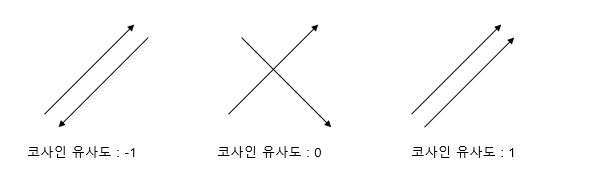


* 뭐로든(word_index, DTM, ...) 수치로 코사인 유사도 비교하면 유사도 결과는 나온다.
* <b>그러나 중요도를 확인하고 싶으면 TF-IDF 로 비교해야 한다.</b>

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbpLIxd%2Fbtq03F9AfHS%2FRTzzEkvHWvqQ5XfQh6rkY1%2Fimg.png"><br>
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbayZ5E%2Fbtq04KWSnlM%2FAkYrOmeom4jOCLv2fBf1HK%2Fimg.png">

* 코사인 유사도 수작업 계산법

In [25]:
df = pd.DataFrame(tfidf_list, columns=vocab)
df


# 역수 데이터

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


In [26]:
A = df.loc[0].values
B = df.loc[1].values
# A, B
res1 = np.dot(A, B)
res2 = np.sqrt(np.sum(A**2)) * np.sqrt(np.sum(B**2))
cs = res1 / res2
cs

# np.sqrt(np.sum(B**2)) 계산 원리 -------------
# B_sum = 0
# for b in B:
#     B_sum +=  b**2
# np.sqrt(B_sum)

0.4133084876261022

## 공통함수

In [27]:
import numpy as np
from numpy.linalg import norm  #--정규화 ||A||
#from numpy import dot

def my_cos_sim(A,B):
    cos_sim = np.dot(A, B) / (norm(A) * norm(B))
    print(cos_sim)   
    
# sklearn...vectorize.. [1,2,3,]
doc1 = [0,1,2,1]
doc2 = [1,0,1,1]
doc3 = [2,0,2,2]
my_cos_sim(doc1,doc2)
my_cos_sim(doc1,doc3)
my_cos_sim(doc2,doc3)    

0.7071067811865476
0.7071067811865476
1.0000000000000002


## 사용예

In [28]:
text_list = ['어제 비가 와서 날씨가 추워졌다.',
            '나는 고양이를 좋아한다.',
            '나는 강아지를 좋아한다.']

In [29]:
Bow = vector.fit_transform(text_list).toarray()

text_col = vector.vocabulary_


text_key = text_col.keys()
print(Bow, text_key)

[[0 0 0 1 1 1 1 0 1]
 [0 1 1 0 0 0 0 1 0]
 [1 0 1 0 0 0 0 1 0]] dict_keys(['어제', '비가', '와서', '날씨가', '추워졌다', '나는', '고양이를', '좋아한다', '강아지를'])


In [30]:
cos_df = pd.DataFrame(Bow, columns =text_key )
cos_df

,어제,비가,와서,날씨가,추워졌다,나는,고양이를,좋아한다,강아지를
0,0,0,0,1,1,1,1,0,1
1,0,1,1,0,0,0,0,1,0
2,1,0,1,0,0,0,0,1,0


In [31]:
tfidfv = TfidfVectorizer().fit(text_list)


print(tfidfv.transform(text_list).toarray()) #------ TF-IDF 계산

print(tfidfv.vocabulary_)

[[0.         0.         0.         0.4472136  0.4472136  0.4472136
  0.4472136  0.         0.4472136 ]
 [0.         0.68091856 0.51785612 0.         0.         0.
  0.         0.51785612 0.        ]
 [0.68091856 0.         0.51785612 0.         0.         0.
  0.         0.51785612 0.        ]]
{'어제': 5, '비가': 4, '와서': 6, '날씨가': 3, '추워졌다': 8, '나는': 2, '고양이를': 1, '좋아한다': 7, '강아지를': 0}


In [32]:
tfdif_arr = tfidfv.transform(text_list).toarray()

tfdif_df = pd.DataFrame(tfdif_arr, columns = tfidfv.vocabulary_.keys()) # 보카 키 값 이용해서 df 만들기

tfdif_df

,어제,비가,와서,날씨가,추워졌다,나는,고양이를,좋아한다,강아지를
0,0.000000,0.000000,0.000000,0.447214,0.447214,0.447214,0.447214,0.000000,0.447214
1,0.000000,0.680919,0.517856,0.000000,0.000000,0.000000,0.000000,0.517856,0.000000
2,0.680919,0.000000,0.517856,0.000000,0.000000,0.000000,0.000000,0.517856,0.000000


In [33]:
# A = tfdif_df.loc[0].values
# B = tfdif_df.loc[1].values
# C = tfdif_df.loc[2].values
# # A, B

# for i, tfdif in enumerate(tfdif_df)
# res1 = np.dot(B, C)
# res2 = np.sqrt(np.sum(B**2)) * np.sqrt(np.sum(C**2))
# cs = res1 / res2
# cs


## [실습] 영화 추천 시스템

- datasets : https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
- https://wikidocs.net/24603 교재

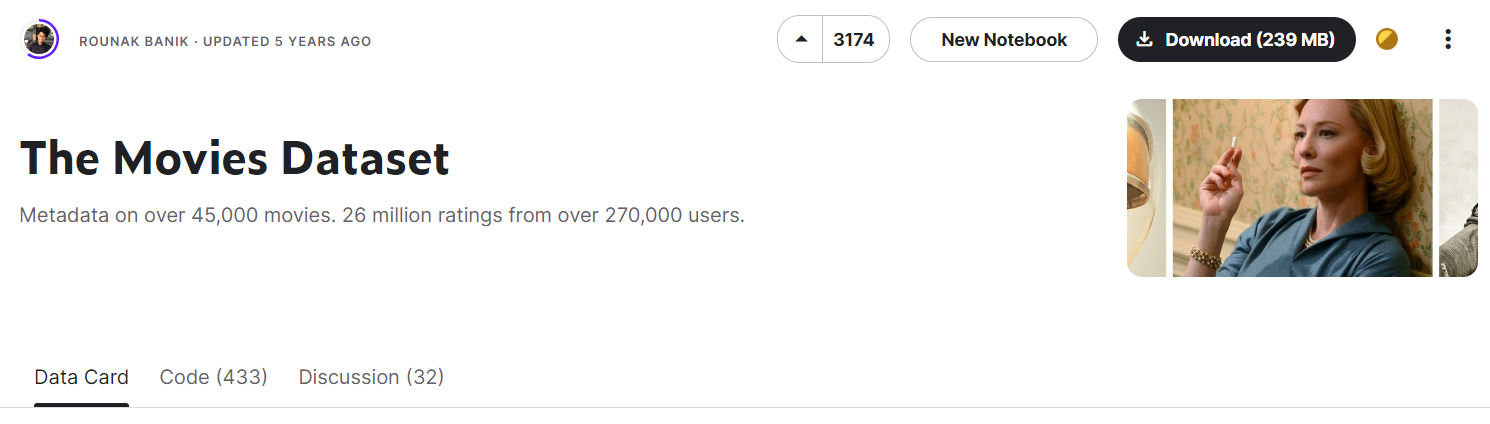

In [34]:
data = pd.read_csv('./datasets/movies_metadata.csv')[:20000]
data.head(1)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


## 결측처리

In [35]:
# overview 열에 존재하는 모든 결측값을 전부 카운트하여 출력
print('overview 열의 결측값의 수:',data['overview'].isnull().sum())

data['overview'] = data['overview'].fillna('')

overview 열의 결측값의 수: 135


* import

In [36]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
print('TF-IDF 행렬의 크기(shape) :',tfidf_matrix.shape)

TF-IDF 행렬의 크기(shape) : (20000, 47487)


## voca 확인하기

In [38]:
# print(tfidf.vocabulary_)

#{'led': 24361, 'woody': 46617, 'andy': 2051, 'toys': 43131,....

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('코사인 유사도 연산 결과 :',cosine_sim.shape)

코사인 유사도 연산 결과 : (20000, 20000)


In [41]:
list(zip(['a','b'],[0,1]))

[('a', 0), ('b', 1)]

In [42]:
# movie_dic = {'영화제목':영화의인덱스}
title_to_index = dict(zip(data['title'], data.index)) # zip : 같은 인덱스끼리 묶어준다.

# 영화 제목 Father of the Bride Part II의 인덱스를 리턴
idx = title_to_index['Father of the Bride Part II'] # title_to_index에 제목 넣으면 인덱스 뭔지 알려줄게
print(idx)

4


In [43]:
data.loc[4, 'title'] #4번 인덱스 타이틀 조회

'Father of the Bride Part II'

## 영화제목 넣으면 코사인 유사도 top 10 리턴

In [44]:
df = pd.DataFrame(cosine_sim, columns =data['title'].values , index = data['title'].values)

In [45]:
df.head(2)

,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II,Heat,Sabrina,Tom and Huck,Sudden Death,GoldenEye,The American President,Dracula: Dead and Loving It,Balto,Nixon,Cutthroat Island,Casino,Sense and Sensibility,Four Rooms,Ace Ventura: When Nature Calls,Money Train,Get Shorty,Copycat,Assassins,Powder,Leaving Las Vegas,Othello,Now and Then,Persuasion,The City of Lost Children,Shanghai Triad,Dangerous Minds,Twelve Monkeys,Wings of Courage,Babe,Carrington,Dead Man Walking,Across the Sea of Time,It Takes Two,Clueless,"Cry, the Beloved Country",Richard III,Dead Presidents,Restoration,Mortal Kombat,To Die For,How To Make An American Quilt,Se7en,Pocahontas,When Night Is Falling,The Usual Suspects,...,Kiss and Tell,"Oui, mais...",Space Adventure Cobra,L'aventure c'est l'aventure,A Season for Miracles,The Awful Truth,1911,Looking for Jackie,The Shaolin Temple,Shaolin Temple 2: Kids from Shaolin,Carol Channing: Larger Than Life,Memory,Martial Arts of Shaolin,Snowmageddon,Stand Up and Fight,Jazz,Barbara,A Liar's Autobiography: The Untrue Story of Monty Python's Graham Chapman,Little Miss Broadway,Miss Annie Rooney,Mr. Belvedere Goes to College,The Hobbit: An Unexpected Journey,Mon Paradis - Der Winterpalast,No Flesh Shall Be Spared,I am Von Höfler Variation on Werther,Born to Defend,Dragon Fight,The Master,Kung Fu Cult Master,The Fitzgerald Family Christmas,Hyde Park on Hudson,Lay the Favorite,Audition/Talent Competition,All's Faire in Love,Crooked Arrows,The Enforcer,Dr. Wai in the Scriptures with No Words,Once Upon a Time in China and America,Contract Killer,The Executor,Never Say... Never!,Calmos,How to Make Love to a Woman,"After Fall, Winter",Violeta Went to Heaven,Rebellion,Versailles,Two in the Wave,Lotte Reiniger: Homage to the Inventor of the Silhouette Film,"RKO Production 601: The Making of 'Kong, the Eighth Wonder of the World'"
Toy Story,1.000000,0.015757,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.041140,0.0,0.0,0.009941,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.019831,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006348,0.000000,0.0,0.009321,0.00000,0.000000,0.0,0.013822,...,0.0,0.0,0.011365,0.0,0.0,0.0,0.011791,0.014688,0.013539,0.007355,0.011161,0.0,0.01452,0.000000,0.000000,0.0,0.000000,0.0,0.019853,0.027106,0.0,0.0,0.0,0.0,0.000000,0.00000,0.117982,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.009979,0.060997,0.000000,0.0,0.0,0.024585,0.0,0.0,0.0
Jumanji,0.015757,1.000000,0.049073,0.0,0.0,0.05183,0.0,0.0,0.106355,0.0,0.007616,0.0,0.0,0.008233,0.0,0.0,0.0,0.028753,0.0,0.0,0.000000,0.0,0.006043,0.0,0.0,0.024285,0.024941,0.006489,0.0,0.0,0.0,0.04725,0.0,0.005560,0.004326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.025758,0.0,0.000000,0.01848,0.008127,0.0,0.016429,...,0.0,0.0,0.004063,0.0,0.0,0.0,0.006281,0.000000,0.000000,0.000000,0.030391,0.0,0.00000,0.027595,0.043131,0.0,0.011296,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.007418,0.01348,0.009529,0.0,0.0,0.060063,0.0,0.0,0.0,0.013191,0.0,0.0,0.0,0.0,0.0,0.0,0.029242,0.000000,0.000000,0.004271,0.0,0.0,0.000000,0.0,0.0,0.0


In [46]:
def my_top10_movie(title, cosine_sim=cosine_sim):
    s = 

SyntaxError: invalid syntax (4087107010.py, line 2)

In [ ]:
def my_top10_movie(title, cosine_sim=cosine_sim):
    
    
    # cos_sim_arr = cos_df.loc[title]
    
    # 선택한 영화의 타이틀로부터 해당 영화의 인덱스를 받아온다.
    idx = title_to_index[title]

    # 해당 영화와 모든 영화와의 유사도를 가져온다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬한다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아온다.
    sim_scores = sim_scores[1:11]
    # sorting 했을 때 제일 max 값은 1이다. 모든게 똑같은 유사도 = 즉 해당 컬럼이 되므로, 0번 index를 제외하고 1부터 추출 
    
    print(sim_scores)
    
    
    # 가장 유사한 10개의 영화의 인덱스를 얻는다.
    movie_indices = [idx_tuple[0] for idx_tuple in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴한다.
    return data['title'].loc[movie_indices]

In [ ]:
my_top10_movie('The Dark Knight Rises')

In [ ]:
data['title'].values

# 유사도 비교하는 것은 영화 대 영화의 비교 = 제목을 비교해야한다. (사실상 오버뷰지만)